In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

### Moderation with a discrete Instrument and Continuous Mediator 

In [2]:
N= 10000


#Instrument
instrument = np.random.choice([0,1], p = [.5,.5], size = N )

# Mediator
eff_iv_med = .2
mediator = np.random.uniform(low = 0, high = 1, size = N)
mediator = mediator + mediator*instrument*eff_iv_med + np.random.normal(0,.2, size = N)

# Outcome
eff_med_out = .1
outcome = mediator*(1 + eff_med_out) + np.random.normal(0,.1, size = N)


df = pd.DataFrame(data = {'outcome':outcome, 'instrument':instrument,'mediator':mediator}).astype({'instrument':'category'})


print('Effect of Instrument on the Mediator:')
display(df.groupby('instrument')['mediator'].describe())

print('Effect of the Instrument on the Outcome:')
display(df.groupby('instrument')['outcome'].describe())



Effect of Instrument on the Mediator:


,count,mean,std,min,25%,50%,75%,max
instrument,,,,,,,,
0,4922.0,0.500965,0.353922,-0.709388,0.235172,0.498201,0.767404,1.502164
1,5078.0,0.600413,0.400838,-0.594497,0.293502,0.604836,0.902015,1.732535


Effect of the Instrument on the Outcome:


,count,mean,std,min,25%,50%,75%,max
instrument,,,,,,,,
0,4922.0,0.552816,0.401555,-0.769050,0.254103,0.550190,0.855817,1.676504
1,5078.0,0.658896,0.453143,-0.692771,0.318240,0.662003,1.001412,1.994774


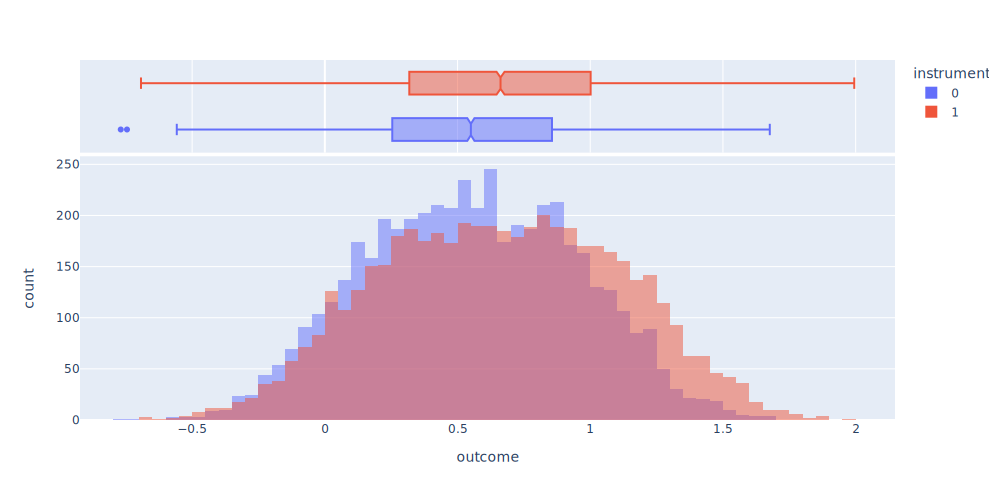

In [3]:

fig = px.histogram(df, x = 'outcome', color = 'instrument', marginal= 'box', opacity= .5)
fig.update_layout(height = 500, width = 1000, barmode = 'overlay')
fig.show('svg')


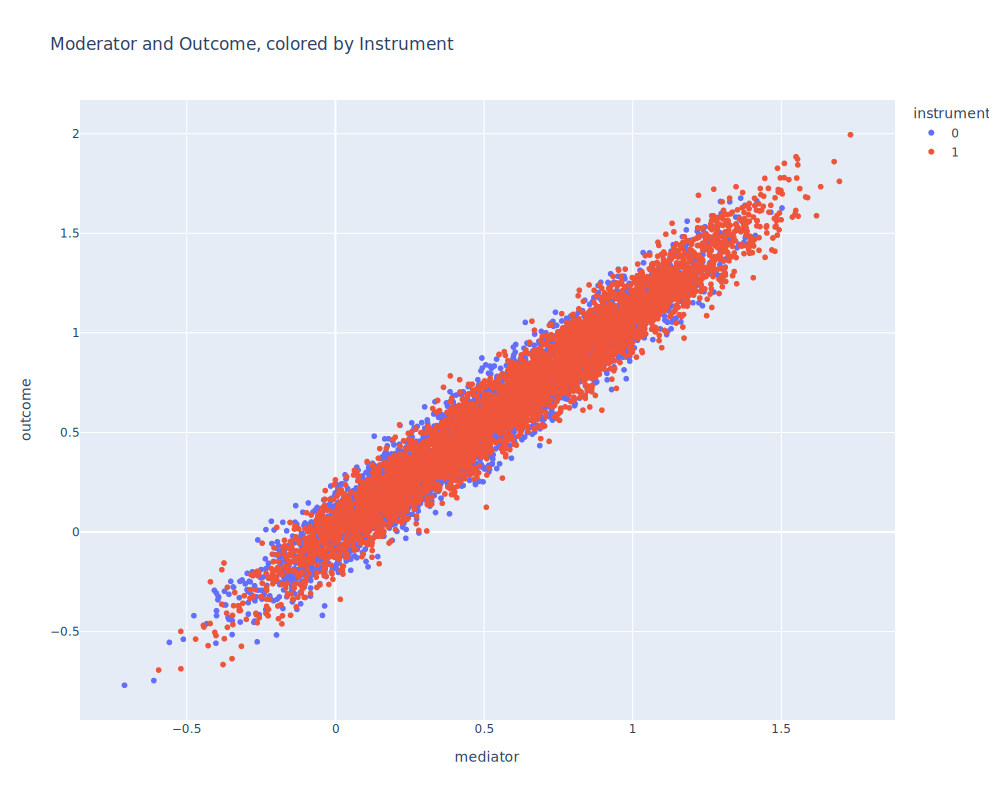

In [4]:
px.scatter(df, 
            x= 'mediator', 
            y = 'outcome', 
            color = 'instrument',
            height = 800,
            width = 1000,
            title = "Moderator and Outcome, colored by Instrument").show('svg')

In [5]:
total = smf.ols(formula='outcome ~ C(instrument)', data = df).fit()
t = total.params[1]
total.params

Intercept             0.552816
C(instrument)[T.1]    0.106080
dtype: float64

In [6]:
.11/df.outcome.mean()

0.1813136982684422

In [7]:
left = smf.ols(formula = 'mediator ~ C(instrument)', data = df).fit()
l = left.params[1]
left.params

Intercept             0.500965
C(instrument)[T.1]    0.099448
dtype: float64

In [8]:
right = smf.ols(formula = 'outcome ~ C(instrument) + mediator', data = df).fit()
r = right.params[2]
right.params

Intercept             0.001115
C(instrument)[T.1]   -0.003440
mediator              1.101277
dtype: float64

In [9]:
# Mediated Effect
med = l*r 
percent_mediated  = med/t
percent_mediated

1.0324306909056158

In [11]:
from linearmodels.iv import IV2SLS

iv_mod = IV2SLS.from_formula("outcome ~ 1 + [mediator ~ instrument]", data = df).fit()
iv_mod.params

ValueError: instruments [exog instruments]  do not have full column rank

In [15]:
import graphviz as gr
g = gr.Digraph()

g.edge("push assigned", "push delivered")
g.edge("push delivered", "in app purchase")
g.edge("income", "in app purchase")
g.edge("income", "push delivered")
g.node("income", color="blue")
g

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH